In [135]:
#import dependencies

import requests as req

#!pip install oauthlib

#!pip install requests_oauthlib

#from oauthlib.oauth2 import MobileApplicationClient

from requests_oauthlib import OAuth2Session

from oauthlib.oauth2 import BackendApplicationClient

import json

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn


#make matplotlib variables

colors = ["orange", "blue", "purple", "red", "yellow", "white", "coral",
          "lightgray", "darkcyan", "cornsilk"]

orange_dot = patches.Patch(color="orange", label ="Chinese")
blue_dot = patches.Patch(color="blue", label = "Mexican")
purple_dot = patches.Patch(color = "purple", label = "French")
red_dot = patches.Patch(color = "red", label = "Japanese")
yellow_dot = patches.Patch(color = "yellow", label = "Mediterranean")
white_dot = patches.Patch(color = "white", label = "American")
coral_dot = patches.Patch(color = "coral", label = "Italian")
lightgray_dot = patches.Patch(color = "lightgray", label = "Korean")
darkcyan_dot = patches.Patch(color = "darkcyan", label = "Thai")
cornsilk_dot = patches.Patch(color = "cornsilk", label = "Indian")

cur_axes = plt.gca()

#target districts and cuisine types of interest

districts = [
                "Castro District", "Chinatown", "Tenderloin", "Inner Richmond", 
                "Inner Sunset", "Alamo Square", "Russian Hill", "Mission", 
                "NorthBeach/Telegraph", "SoMa"
            ]
types = [
                "Chinese", "Mexican", "French", "Japanese", "Mediterranean", 
                "American", "Italian", "Korean", "Thai", "Indian"
            ]


client_id = '4uTbw25Hz64FoLUR1M_A7g'
client_secret = 'chHd4QfTsB3iwuGfFmnHH1KAaAL6NEnH9kr12HEPx5gQwbS1vwB0o5QTRMq87X6D'

client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='https://api.yelp.com/oauth2/token', client_id=client_id,
        client_secret=client_secret)

#print(token['access_token'])

tok = token['access_token']

url = "https://api.yelp.com/v3/businesses/search"

headers = {
    'Authorization': 'Bearer %s' % tok,
}


typeSum = {}
Ratings = {}
countReviews = {}




for x in districts:
    typeCount = {}
    typeRating = {}
    typeReview = {}
    for y in types:
        
        url_params = {
            'term': y,
            'location': x,
            'limit': 50,
            'radius': 750
            
        }
        
        headers = {
            'Authorization': 'Bearer %s' % tok
        }
        
        reviewcall = req.get(url, headers=headers, params=url_params)
        
        try:
            reviews = reviewcall.json()
        except:
            print(reviewcall.json())
        
        
        
        for rev in reviews['businesses']:
            try:
                if y not in typeCount:
                    typeRating[y] = rev["rating"]
                    typeCount[y] = 1
                    typeReview[y] = rev["review_count"]
                    
                else:
                    typeRating[y] += rev["rating"]
                    typeCount[y] += 1
                    typeReview[y] += rev["review_count"]
            except:
                continue
        
        


    typeSum[x] = typeCount
    
    ratingType = [round((typeRating[rest]/typeCount[rest]),2) for rest in typeRating]
    Ratings[x] = ratingType
    
    ReviewCount = [value for rest, value in typeReview.items()]
    countReviews[x] = ReviewCount

#print(typeSum)
#print(Ratings)
#print(countReviews)


In [50]:
castroDistrictTypes = [value for rest, value in typeSum["Castro District"].items()]
chinaTownTypes = [value for rest, value in typeSum["Chinatown"].items()]
tenderLoinTypes = [value for rest, value in typeSum["Tenderloin"].items()]
innerRichmondTypes = [value for rest, value in typeSum["Inner Richmond"].items()]
innerSunsetTypes = [value for rest, value in typeSum["Inner Sunset"].items()]
alamoSquareTypes = [value for rest, value in typeSum["Alamo Square"].items()]
russianHillTypes = [value for rest, value in typeSum["Russian Hill"].items()]
missionTypes = [value for rest, value in typeSum["Mission"].items()]
northBeachTypes = [value for rest, value in typeSum["NorthBeach/Telegraph"].items()]
soMaTypes = [value for rest, value in typeSum["SoMa"].items()]

castroDistrictRates = = Ratings["Castro District"]
chinaTownRates = Ratings["Chinatown"]
tenderLoinRates = Ratings["Tenderloin"]
innerRichmondRates = Ratings["Inner Richmond"]
innerSunsetRates = Ratings["Inner Sunset"]
alamoSquareRates = Ratings["Alamo Square"]
russianHillRates = Ratings["Russian Hill"]
missionRates = Ratings["Mission"]
northBeachRates = Ratings["NorthBeach/Telegraph"]
soMaRates = Ratings["SoMa"]

castroDistrictCounts = countReviews["Castro District"]
chinaTownCounts = countReviews["Chinatown"]
tenderLoinCounts = countReviews["Tenderloin"]
innerRichmondCounts = countReviews["Inner Richmond"]
innerSunsetCounts = countReviews["Inner Sunset"]
alamoSquareCounts = countReviews["Alamo Square"]
russianHillCounts = countReviews["Russian Hill"]
missionCounts = countReviews["Mission"]
northBeachCounts = countReviews["NorthBeach/Telegraph"]
soMaCounts = countReviews["SoMa"]




#print(castroDistrict)
#print(chinaTown)
#print(tenderLoin)
#print(innerRichmond)
#print(innerSunset)
#print(alamoSquare)
#print(russianHill)
#print(mission)
#print(northBeach)
#print(soMa)


[12, 29, 12, 16, 4, 50, 30, 12, 12, 3]
[3.71, 3.76, 4.04, 3.78, 3.62, 3.94, 3.62, 3.83, 3.83, 3.67]
[20253, 37677, 15345, 19697, 7634, 37266, 20504, 18628, 28701, 16936]


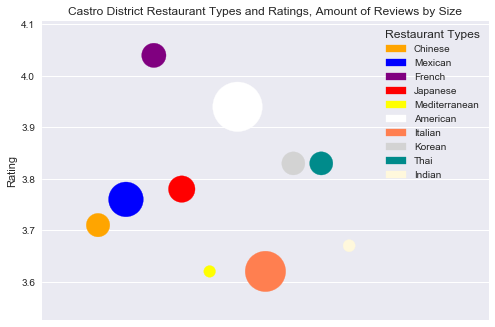

In [194]:
cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            castroDistrictRates, 
            s=[0.1*x for x in castroDistrictCounts],
            color = colors)


plt.title("Castro District Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")


plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("castroDistrictTypesRatings.png")
plt.show()

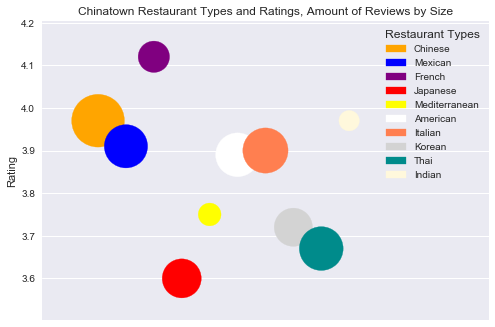

In [195]:
cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            chinaTownRates, 
            s=[0.1*x for x in chinaTownCounts],
            color = colors)


plt.title("Chinatown Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("chinaTownTypesRatings.png")
plt.show()

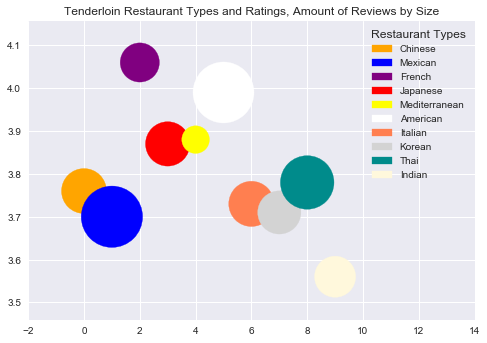

In [196]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            tenderLoinRates, 
            s=[0.1*x for x in tenderLoinCounts],
            color = colors)


plt.xlim([-2, 14])
plt.title("Tenderloin Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")
plt.savefig("tenderLoinTypesRatings.png")
plt.show()

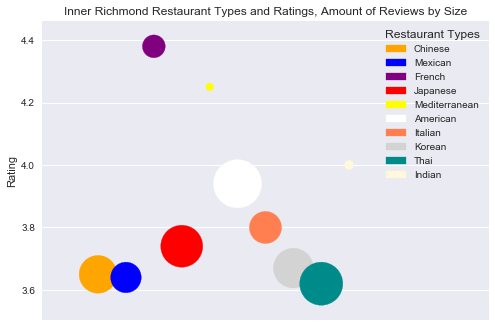

In [197]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            innerRichmondRates, 
            s=[0.1*x for x in innerRichmondCounts],
            color = colors)


plt.title("Inner Richmond Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("innerRichmondTypesRatings.png")
plt.show()

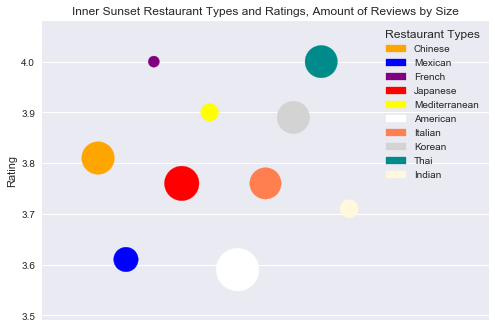

In [198]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            innerSunsetRates, 
            s=[0.1*x for x in innerSunsetCounts],
            color = colors)


plt.title("Inner Sunset Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")


plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("innerSunsetTypesRatings.png")
plt.show()

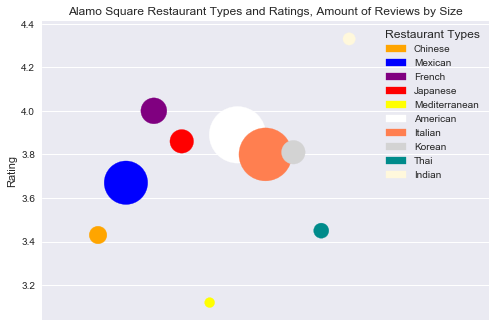

In [199]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            alamoSquareRates, 
            s=[0.1*x for x in alamoSquareCounts],
            color = colors)


plt.title("Alamo Square Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")


plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("alamoSquareRatings.png")
plt.show()

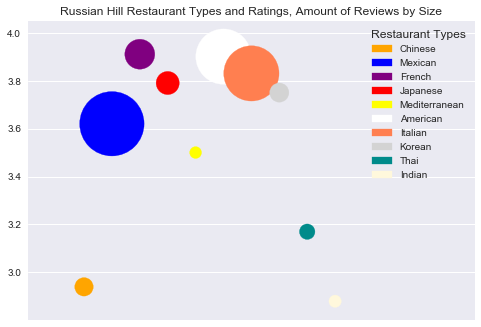

In [200]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            russianHillRates, 
            s=[0.1*x for x in russianHillCounts],
            color = colors)


plt.title("Russian Hill Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")


plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.savefig("russianHillRatings.png")
plt.show()

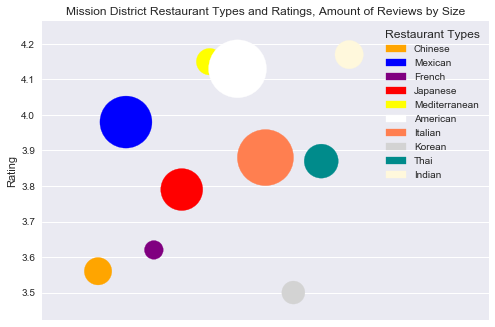

In [201]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            missionRates, 
            s=[0.1*x for x in missionCounts],
            color = colors)


plt.title("Mission District Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("missionRatings.png")
plt.show()

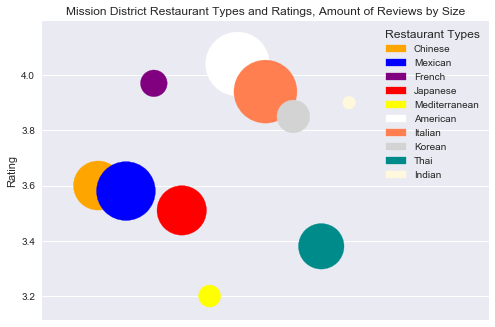

In [202]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            northBeachRates, 
            s=[0.1*x for x in northBeachCounts],
            color = colors)


plt.title("Mission District Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("northBeachRatings.png")
plt.show()

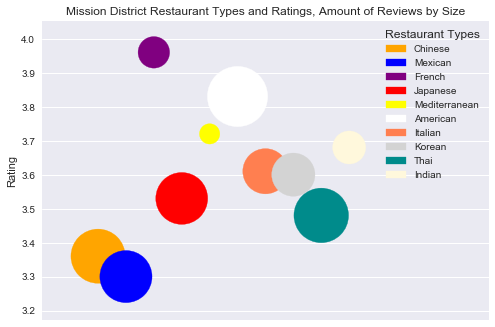

In [203]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            soMaRates, 
            s=[0.1*x for x in soMaCounts],
            color = colors)


plt.title("Mission District Restaurant Types and Ratings, Amount of Reviews by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("soMa.png")
plt.show()

In [ ]:
# Start new bubble plot types

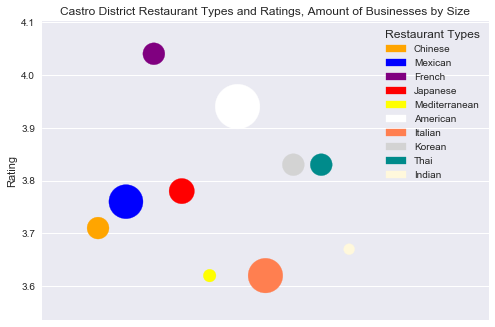

In [204]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            castroDistrictRates, 
            s=[40*x for x in castroDistrictTypes],
            color = colors)


plt.title("Castro District Restaurant Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("CastroDistrictCounts.png")
plt.show()

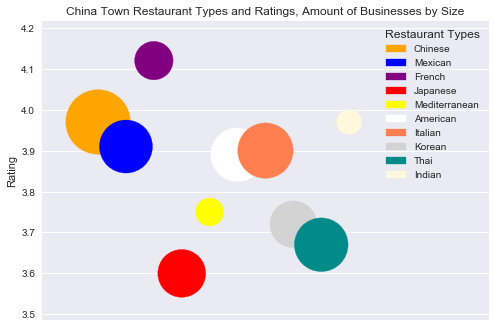

In [205]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            chinaTownRates, 
            s=[0.15*x for x in chinaTownCounts],
            color = colors)


plt.title("China Town Restaurant Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("ChinaTownCounts.png")
plt.show()

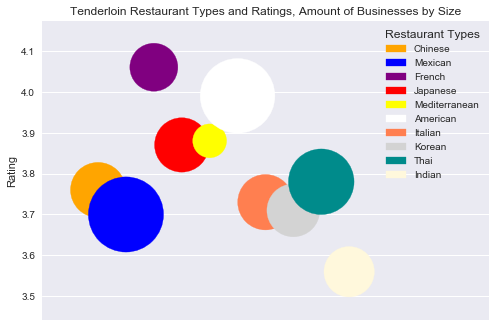

In [206]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            tenderLoinRates, 
            s=[0.15*x for x in tenderLoinCounts],
            color = colors)


plt.title("Tenderloin Restaurant Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")


plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("TenderloinCounts.png")
plt.show()

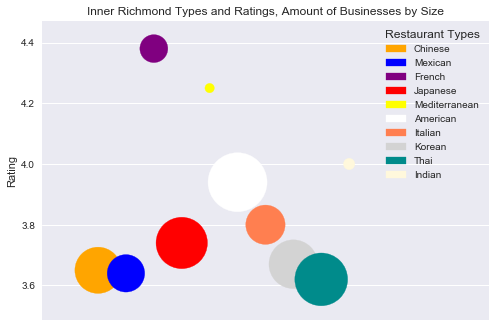

In [207]:

cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            innerRichmondRates, 
            s=[0.15*x for x in innerRichmondCounts],
            color = colors)


plt.title("Inner Richmond Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("innerRichmondCounts.png")
plt.show()

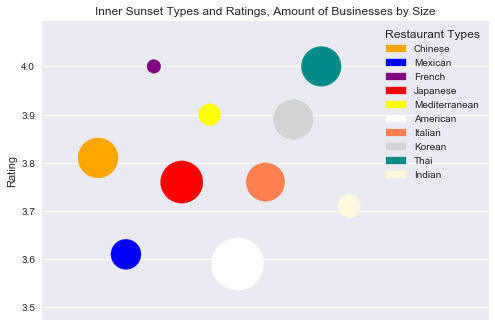

In [208]:
cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            innerSunsetRates, 
            s=[0.15*x for x in innerSunsetCounts],
            color = colors)


plt.title("Inner Sunset Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("innerSunsetCounts.png")
plt.show()

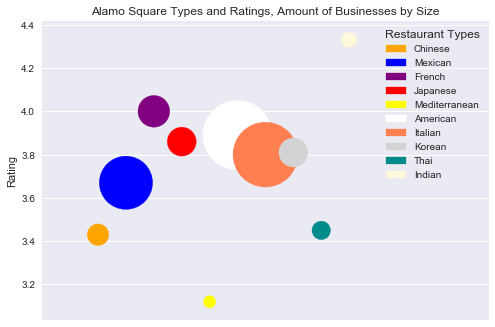

In [209]:
cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            alamoSquareRates, 
            s=[0.15*x for x in alamoSquareCounts],
            color = colors)


plt.title("Alamo Square Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("alamoSquareCounts.png")
plt.show()

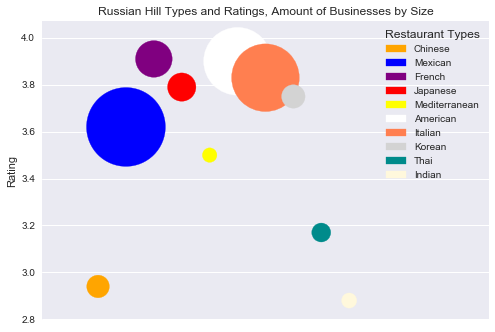

In [210]:
cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            russianHillRates, 
            s=[0.15*x for x in russianHillCounts],
            color = colors)


plt.title("Russian Hill Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("RussianHillCounts.png")
plt.show()

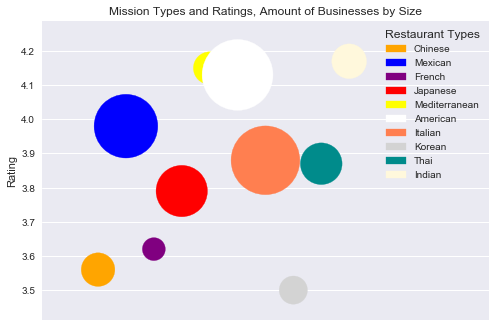

In [211]:
cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            missionRates, 
            s=[0.15*x for x in missionCounts],
            color = colors)


plt.title("Mission Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("MissionHillCounts.png")
plt.show()

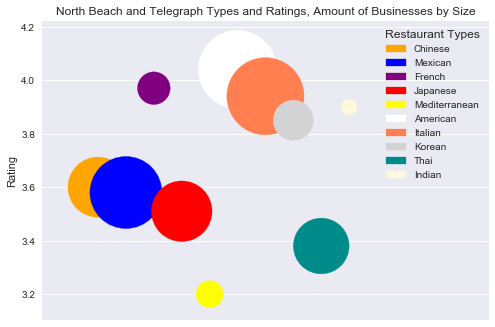

In [212]:
cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            northBeachRates, 
            s=[0.15*x for x in northBeachCounts],
            color = colors)


plt.title("North Beach and Telegraph Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("northBeachCounts.png")
plt.show()

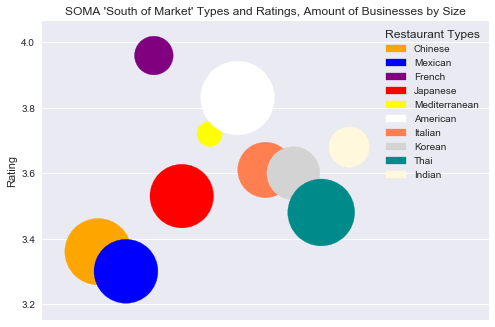

In [213]:
cur_axes = plt.gca()
plt.scatter(range(len(types)), 
            soMaRates, 
            s=[0.15*x for x in soMaCounts],
            color = colors)


plt.title("SOMA 'South of Market' Types and Ratings, Amount of Businesses by Size")

plt.legend(handles = [orange_dot, blue_dot, purple_dot, red_dot, yellow_dot,
                     white_dot, coral_dot, lightgray_dot, darkcyan_dot, cornsilk_dot
                     ], title = "Restaurant Types", loc="upper right")

plt.xlim([-2, 14])
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Rating')
plt.savefig("soMaCounts.png")
plt.show()